<a href="https://colab.research.google.com/github/crogers-cardiffmet/Data-Analysis/blob/main/PRAC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Task 1: Merging CSV Files**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd '/content/drive/MyDrive/Air_Data'

/content/drive/MyDrive/Air_Data


In [4]:
%ls

combined_output.csv
PRSA_Data_Changping_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv
PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Nongzhanguan_20130301-20170228.csv


In [5]:
import pandas as pd
import glob

folder_path = "/content/drive/MyDrive/Air_Data/*.csv"

csv_files = glob.glob(folder_path)

combined_df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

combined_df.to_csv("/content/drive/MyDrive/Air_Data/combined_output.csv", index=False)

print("Merged files into 'combined_output.csv'.")


Merged files into 'combined_output.csv'.


### **Task 2.1: Data Understanding**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
df = pd.read_csv("combined_output.csv")
df_original = df.copy()
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [7]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 841536 rows and 18 columns.


In [8]:
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841536 entries, 0 to 841535
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       841536 non-null  int64  
 1   year     841536 non-null  int64  
 2   month    841536 non-null  int64  
 3   day      841536 non-null  int64  
 4   hour     841536 non-null  int64  
 5   PM2.5    822906 non-null  float64
 6   PM10     827424 non-null  float64
 7   SO2      825234 non-null  float64
 8   NO2      813942 non-null  float64
 9   CO       797460 non-null  float64
 10  O3       823986 non-null  float64
 11  TEMP     840672 non-null  float64
 12  PRES     840678 non-null  float64
 13  DEWP     840660 non-null  float64
 14  RAIN     840660 non-null  float64
 15  wd       837948 non-null  object 
 16  WSPM     840816 non-null  float64
 17  station  841536 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 115.6+ MB


In [10]:
print(df['station'].nunique())  # Number of different stations
print(df['wd'].nunique())  # Number of different wind directions

4
16


In [11]:
print(df.describe())

                  No           year          month            day  \
count  841536.000000  841536.000000  841536.000000  841536.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.110929       1.177197       3.448705       8.800097   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  841536.000000  822906.000000  827424.000000  825234.000000   
mean       11.500000      77.959361     101.390813      16.088154   
std         6.922191      79.807798      90.731672      22.037807   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      19.0000

In [12]:
df.describe(include=['object'])

,wd,station
count,837948,841536
unique,16,4
top,NW,Nongzhanguan
freq,82278,210384


In [13]:
def missing_values_table(df):
        mis_val = df.isnull().sum()

        mis_val_percent = 100 * df.isnull().sum() / len(df)

        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        return mis_val_table_ren_columns

missing_values= missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

             0         1
No           0  0.000000
year         0  0.000000
month        0  0.000000
day          0  0.000000
hour         0  0.000000
PM2.5    18630  2.213809
PM10     14112  1.676934
SO2      16302  1.937172
NO2      27594  3.279004
CO       44076  5.237566
O3       17550  2.085472
TEMP       864  0.102669
PRES       858  0.101956
DEWP       876  0.104095
RAIN       876  0.104095
wd        3588  0.426363
WSPM       720  0.085558
station      0  0.000000


,Missing Values,% of Total Values
CO,44076,5.237566
NO2,27594,3.279004
PM2.5,18630,2.213809
O3,17550,2.085472
SO2,16302,1.937172
PM10,14112,1.676934
wd,3588,0.426363
RAIN,876,0.104095
DEWP,876,0.104095
TEMP,864,0.102669


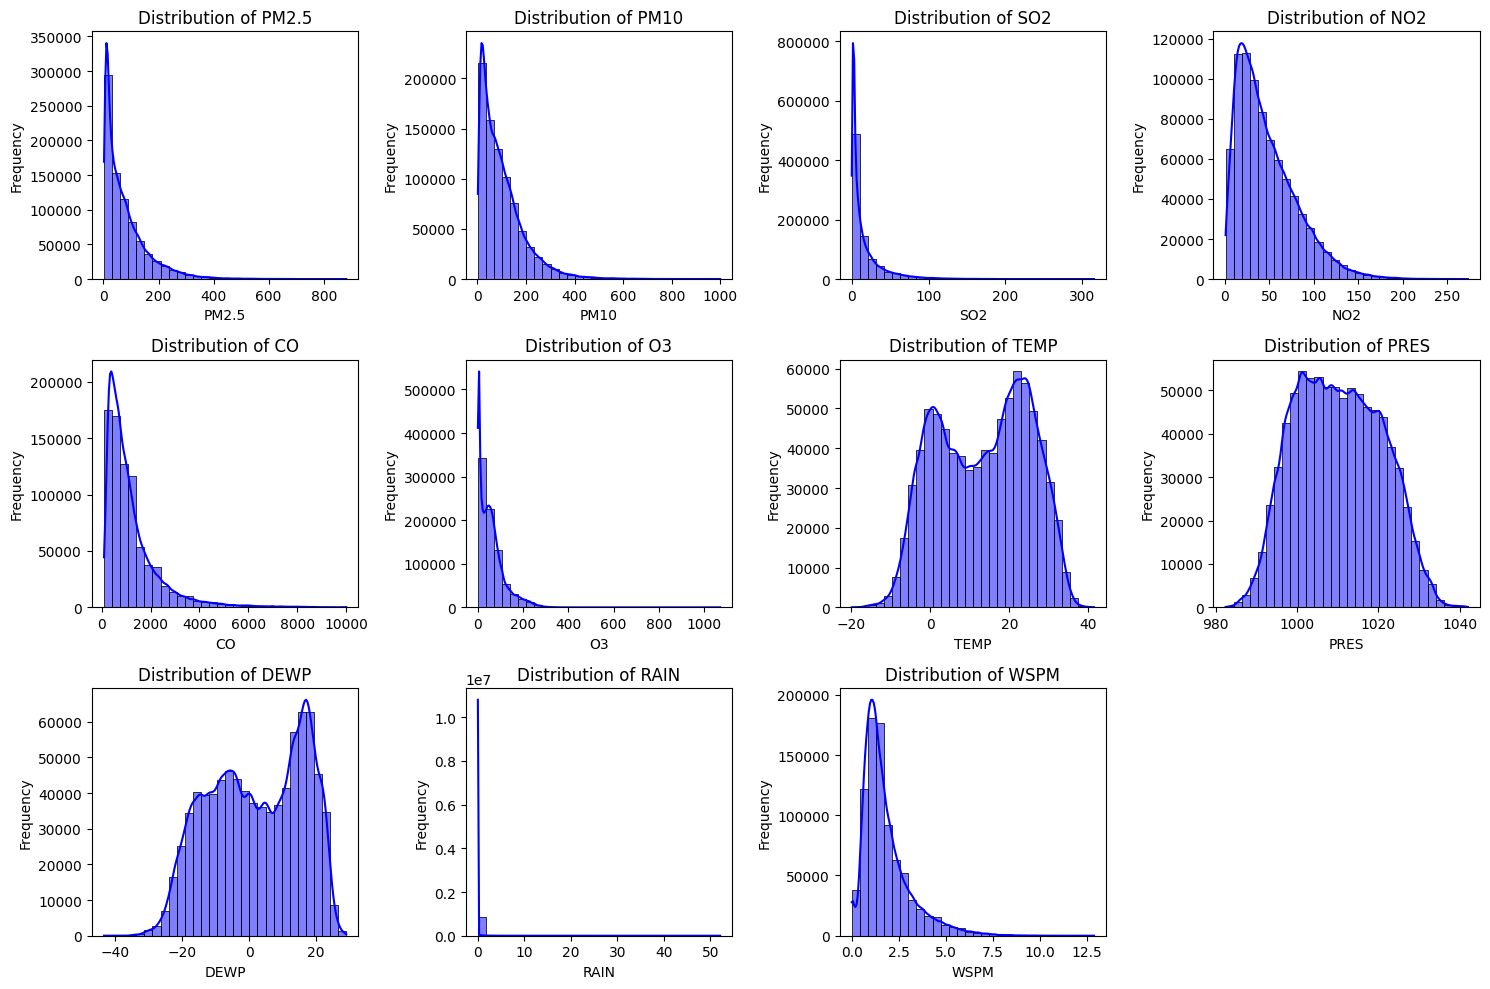

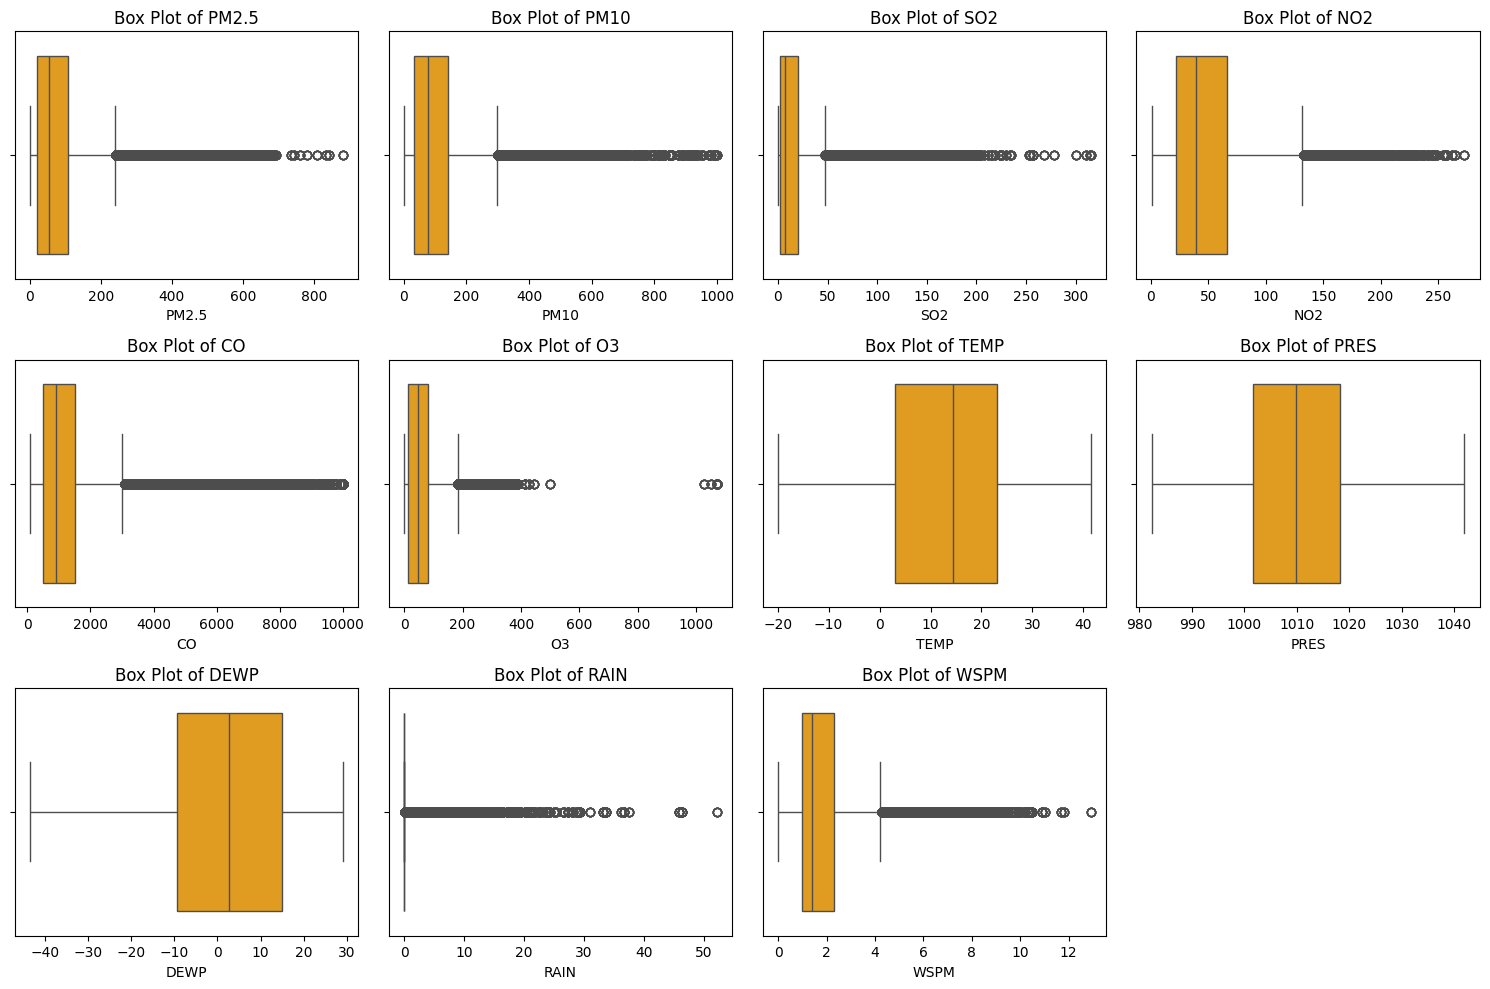

In [14]:
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [15]:
skewness_before = df_original[numerical_columns].skew()
print("Skewness before transformations:")
print(skewness_before)

Skewness before transformations:
PM2.5     2.007000
PM10      1.960002
SO2       2.893111
NO2       1.148788
CO        2.646216
O3        2.067808
TEMP     -0.114352
PRES      0.104663
DEWP     -0.173150
RAIN     27.648248
WSPM      1.722940
dtype: float64


### **Task 2.2: Data Preprocessing**

In [16]:
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

categorical_columns = ['station', 'wd']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [17]:
missing_values = missing_values_table(df)
missing_values.style.background_gradient(cmap='Oranges')

           0         1
No         0  0.000000
year       0  0.000000
month      0  0.000000
day        0  0.000000
hour       0  0.000000
PM2.5      0  0.000000
PM10       0  0.000000
SO2        0  0.000000
NO2        0  0.000000
CO         0  0.000000
O3         0  0.000000
TEMP     864  0.102669
PRES     858  0.101956
DEWP     876  0.104095
RAIN     876  0.104095
wd         0  0.000000
WSPM     720  0.085558
station    0  0.000000


,Missing Values,% of Total Values
DEWP,876,0.104095
RAIN,876,0.104095
TEMP,864,0.102669
PRES,858,0.101956
WSPM,720,0.085558
No,0,0.000000
year,0,0.000000
month,0,0.000000
hour,0,0.000000
day,0,0.000000


In [18]:
df.duplicated().sum()
df = df.drop_duplicates()

In [20]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']].astype(str).agg(
    lambda x: '-'.join(x.str.zfill(2)), axis=1), format='%Y-%m-%d-%H')

print(df[['date']].head())

                 date
0 2013-03-01 00:00:00
1 2013-03-01 01:00:00
2 2013-03-01 02:00:00
3 2013-03-01 03:00:00
4 2013-03-01 04:00:00


In [21]:
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station                date  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan 2013-03-01 00:00:00  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan 2013-03-01 01:00:00  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan 2013-03-01 02:00:00  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan 2013-03-01 03:00:00  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan 2013-03-01 04:00:00  


In [22]:
df_encoded = pd.get_dummies(df, columns=['station', 'wd'], drop_first=True)

print(df_encoded.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...  wd_NNW  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  ...    True   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  ...   False   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  ...    True   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  ...   False   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  ...    True   

   wd_NW   wd_S  wd_SE  wd_SSE  wd_SSW  wd_SW   wd_W  wd_WNW  wd_WSW  
0  False  False  False   False   False  False  False   False   False  
1   True  False  False   False   False  False  False   False   False  
2  False  False  False   False   False  False  False   False   False  
3  False  False  False   False   False  False  False   False   False  
4  False  False  False   False   False  False  False   False   False  

[5 rows x 35 columns]


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
df_cleaned.reset_index(drop=True, inplace=True)

In [25]:
log_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

df_cleaned[log_columns] = df_cleaned[log_columns].apply(lambda x: np.log1p(x))

skewness_after_log = df_cleaned[log_columns].skew()
print("Skewness after log transformation:")
print(skewness_after_log)

Skewness after log transformation:
PM2.5   -0.271632
PM10    -2.239566
SO2      0.791514
NO2     -1.053526
CO      -1.624397
O3      -1.523597
dtype: float64


Skewness after square root transformation:
PM2.5    0.623754
PM10     0.701239
SO2      0.681645
NO2      0.271985
CO       0.795941
O3       0.683443
dtype: float64


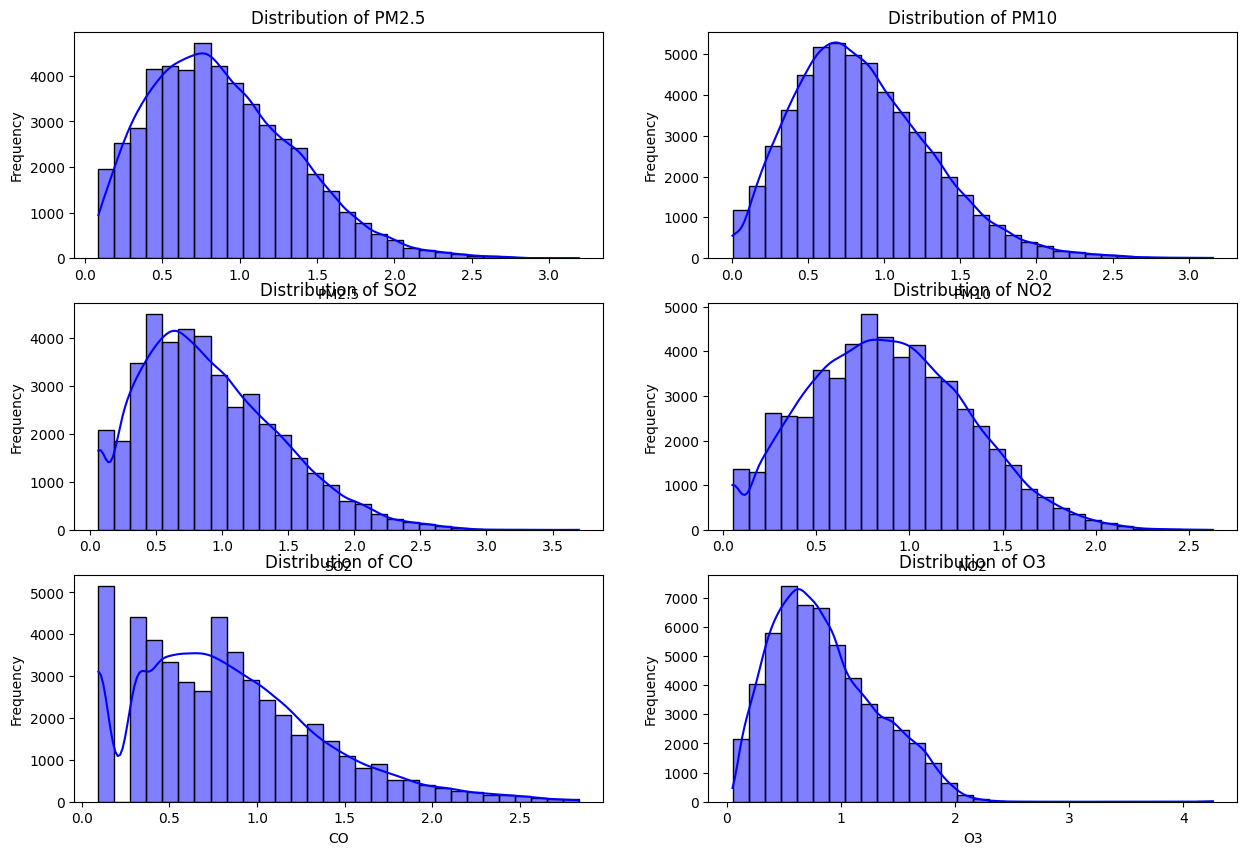

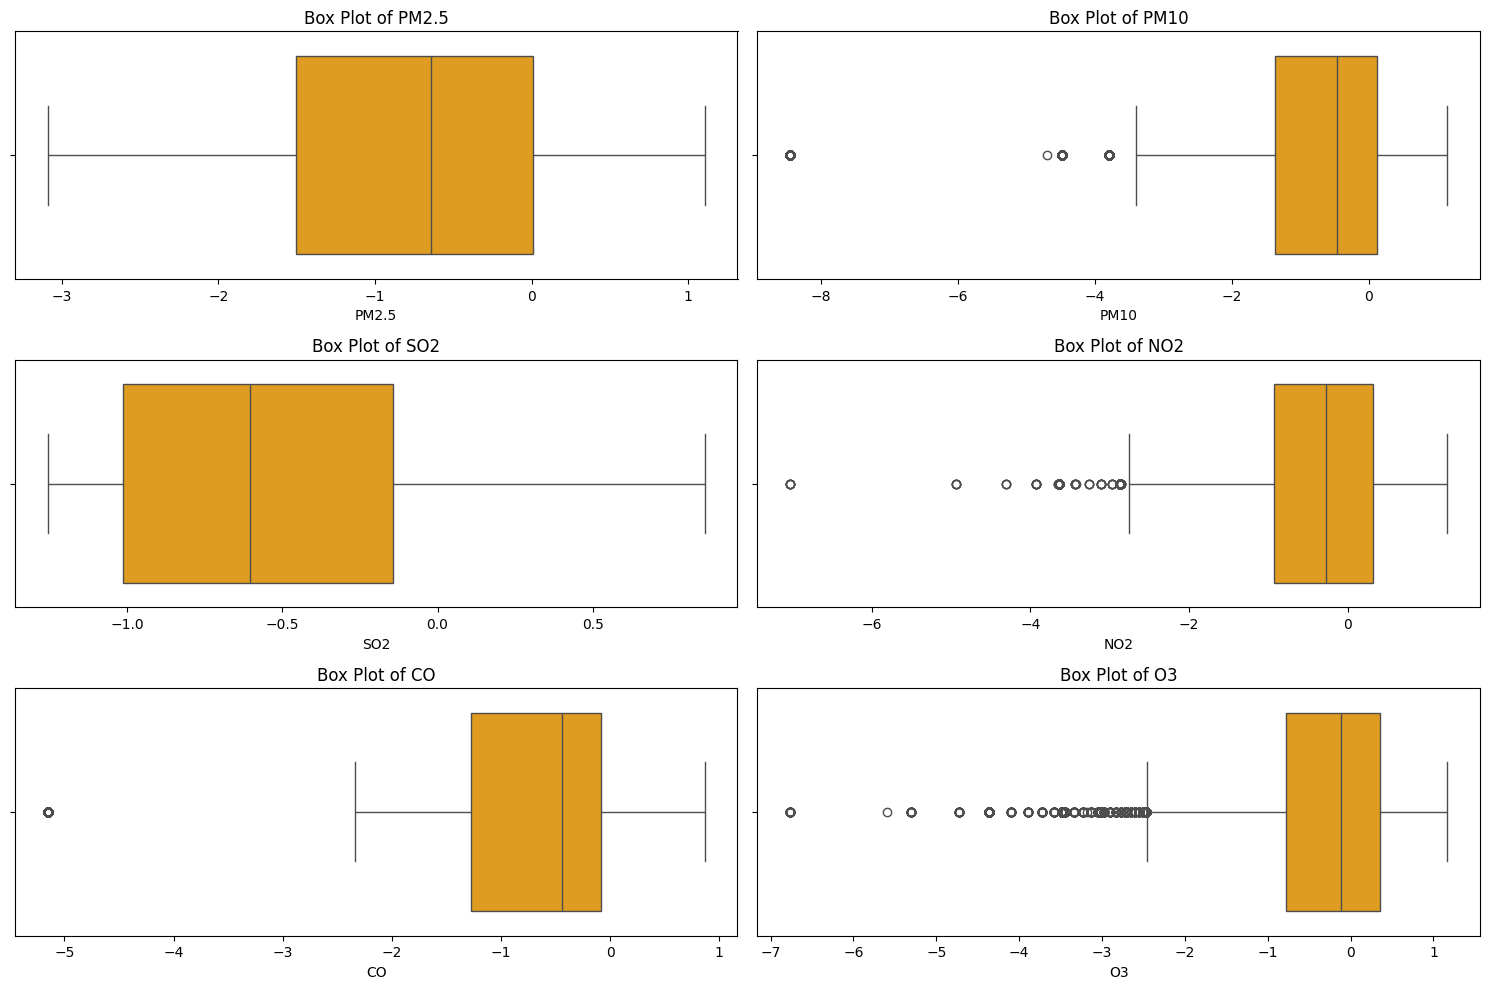

In [26]:
sqrt_columns = ['PM2.5','PM10', 'SO2','NO2', 'CO', 'O3']
df[sqrt_columns] = df[sqrt_columns].apply(np.sqrt)

skewness_after_sqrt = df[sqrt_columns].skew()
print("Skewness after square root transformation:")
print(skewness_after_sqrt)

plt.figure(figsize=(15, 10))
for i, col in enumerate(sqrt_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.figure(figsize=(15, 10))
for i, col in enumerate(sqrt_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df_cleaned[col], color='orange')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### **Task 2.3: Computation-based Analysis and Visualisation**

In [27]:
#Univariate Analysis

print(df.describe())

               No           year          month            day           hour  \
count  140256.000  140256.000000  140256.000000  140256.000000  140256.000000   
mean    17532.500    2014.662560       6.522930      15.729637      11.500000   
min         1.000    2013.000000       1.000000       1.000000       0.000000   
25%      8766.750    2014.000000       4.000000       8.000000       5.750000   
50%     17532.500    2015.000000       7.000000      16.000000      11.500000   
75%     26298.250    2016.000000      10.000000      23.000000      17.250000   
max     35064.000    2017.000000      12.000000      31.000000      23.000000   
std     10122.141       1.177201       3.448715       8.800123       6.922211   

              PM2.5          PM10           SO2           NO2            CO  \
count  50799.000000  54630.000000  42611.000000  56802.000000  48316.000000   
mean       0.889914      0.860256      0.906990      0.888594      0.836444   
min        0.086650      0.003993

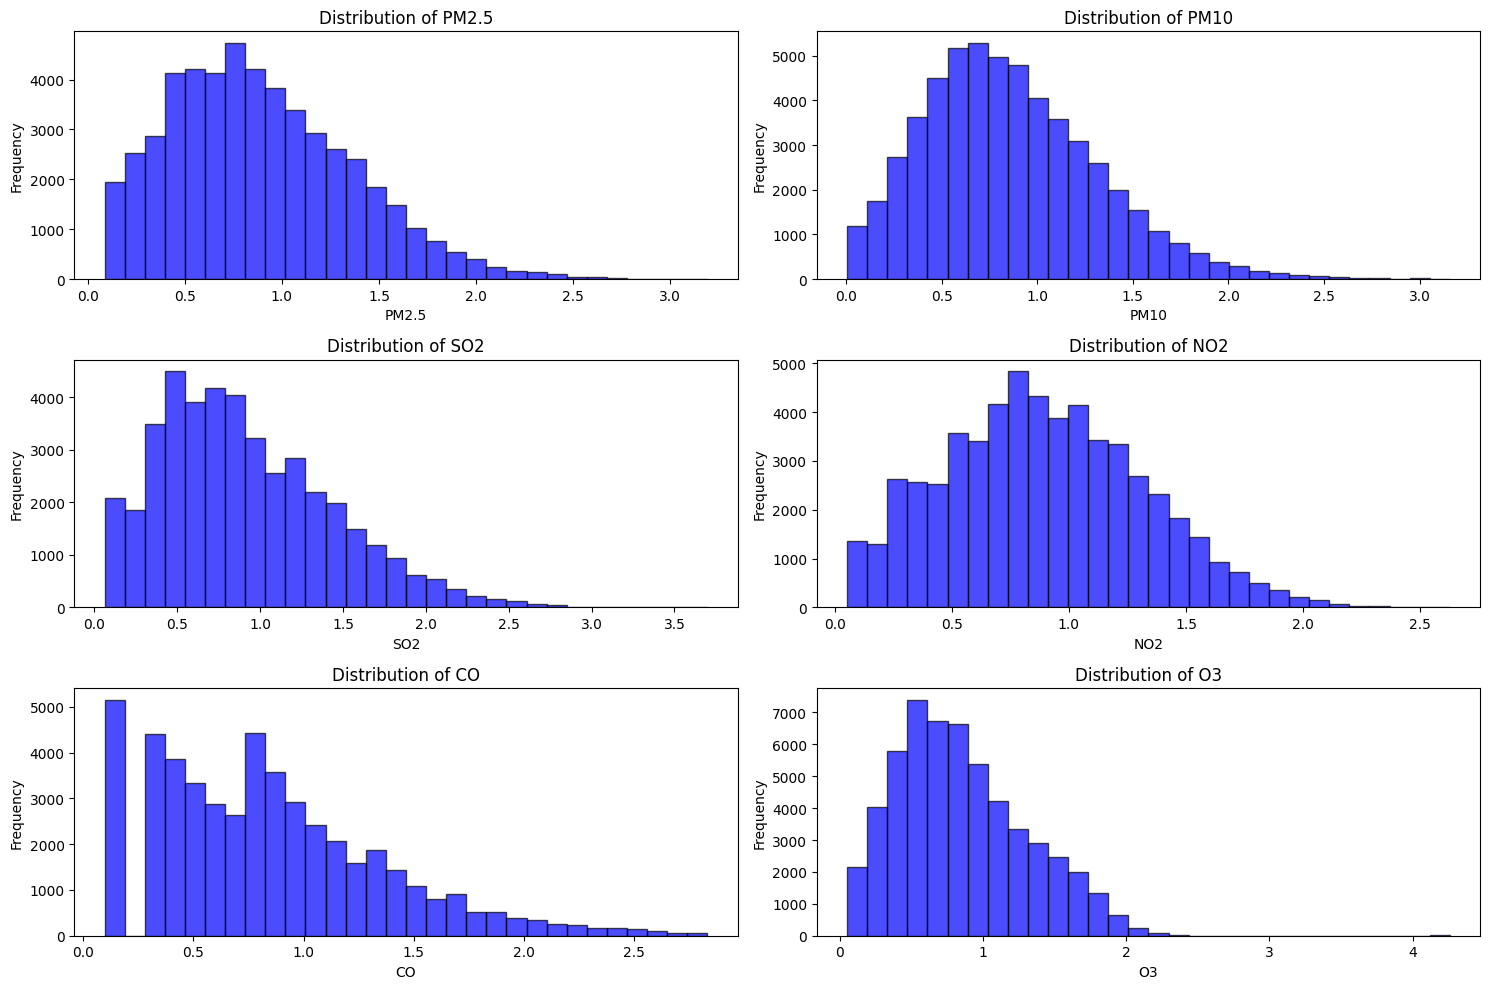

In [28]:
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30, color='blue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

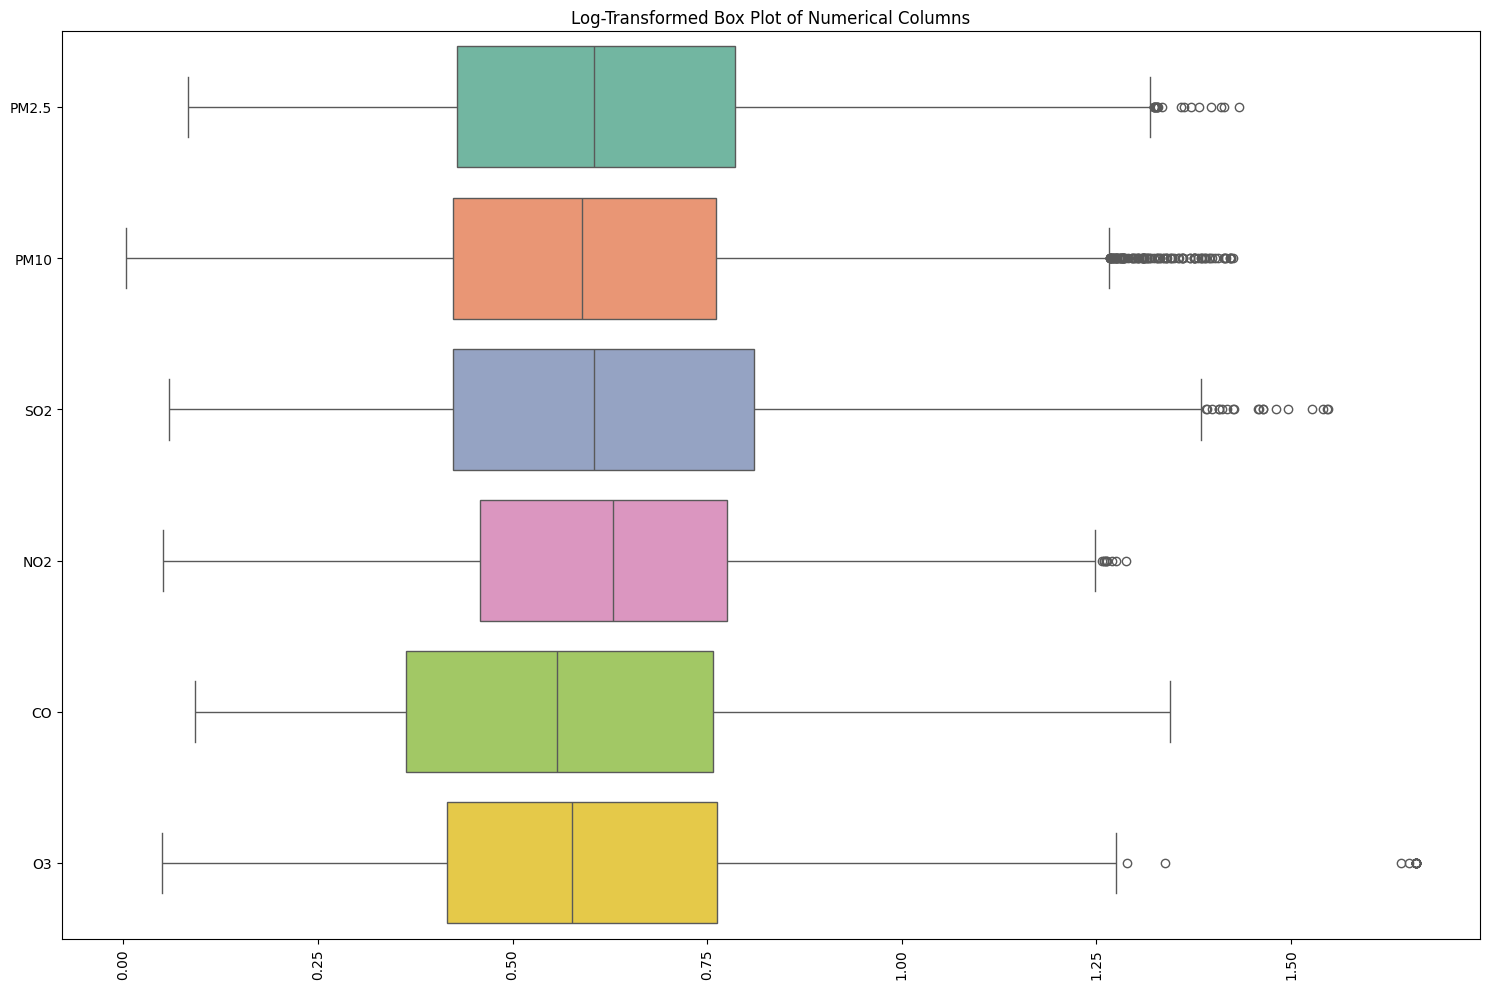

In [29]:
log_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

df[log_columns] = df[log_columns].apply(lambda x: np.log1p(x))

plt.figure(figsize=(15, 10))
sns.boxplot(data=df[log_columns], orient='h', palette='Set2')
plt.xticks(rotation=90)
plt.title('Log-Transformed Box Plot of Numerical Columns')
plt.tight_layout()
plt.show()

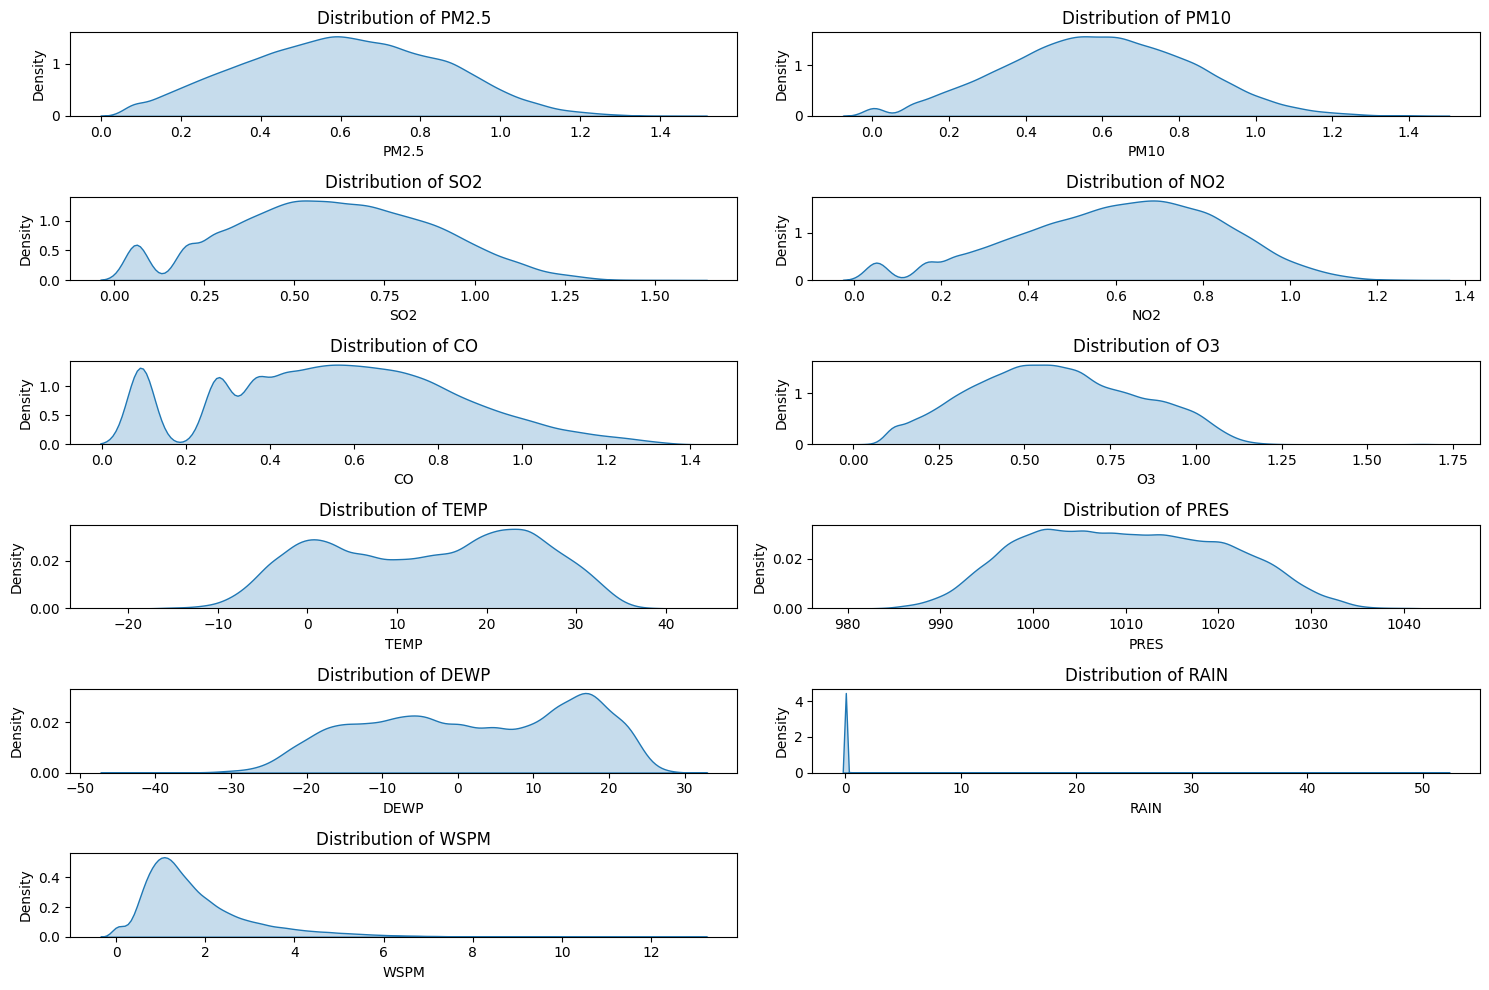

In [30]:
exclude_columns = ['No', 'year', 'month', 'day', 'hour']

numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.kdeplot(df[col], shade=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

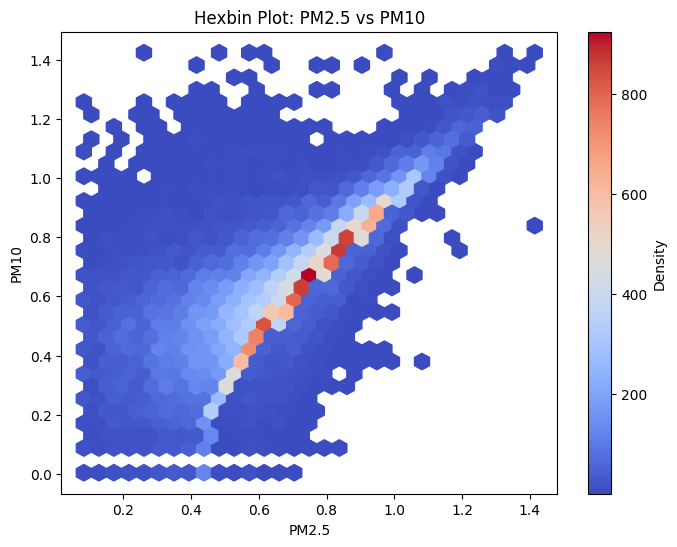

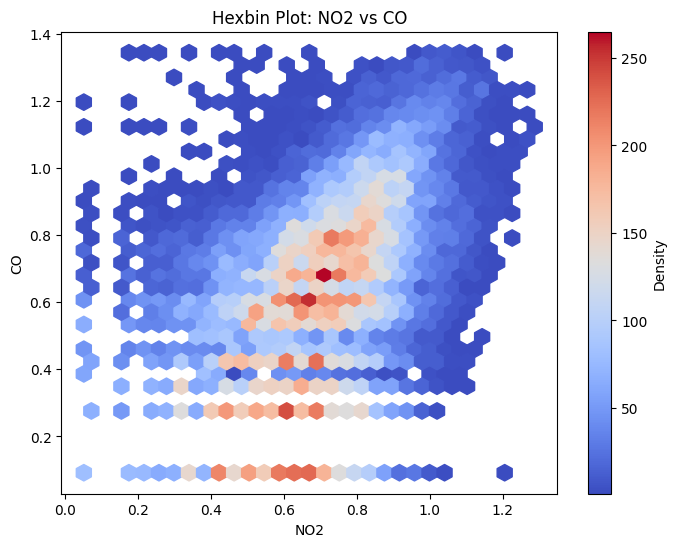

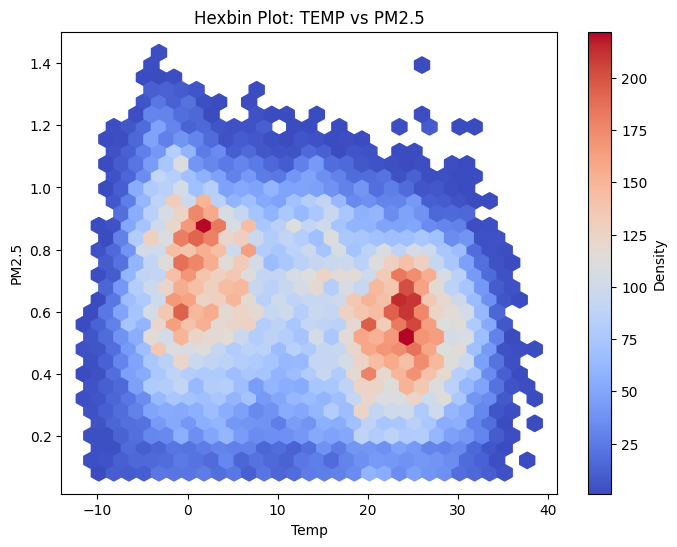

In [31]:
#Bivariate Analysis

plt.figure(figsize=(8, 6))
plt.hexbin(df['PM2.5'], df['PM10'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Density')
plt.title('Hexbin Plot: PM2.5 vs PM10')
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.show()


plt.figure(figsize=(8, 6))
plt.hexbin(df['NO2'], df['CO'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Density')
plt.title('Hexbin Plot: NO2 vs CO')
plt.xlabel('NO2')
plt.ylabel('CO')
plt.show()


plt.figure(figsize=(8, 6))
plt.hexbin(df['TEMP'], df['PM2.5'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Density')
plt.title('Hexbin Plot: TEMP vs PM2.5')
plt.xlabel('Temp')
plt.ylabel('PM2.5')
plt.show()

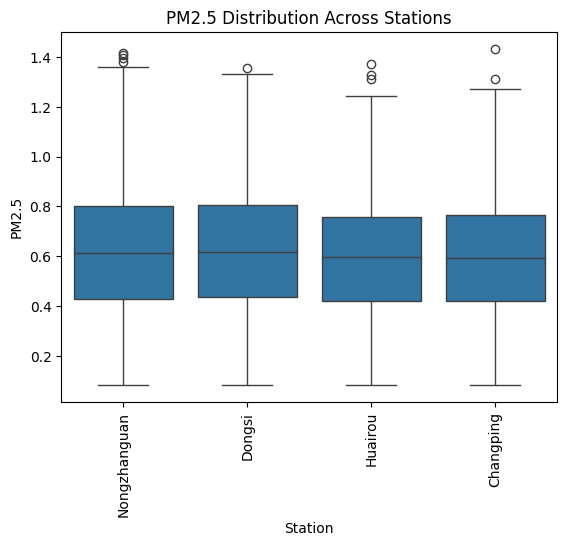

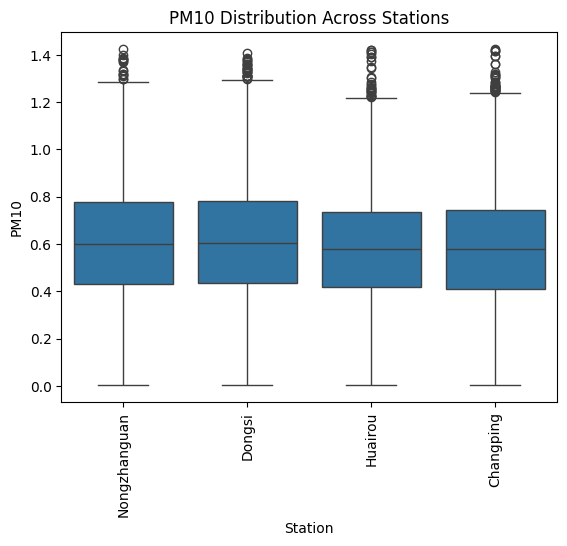

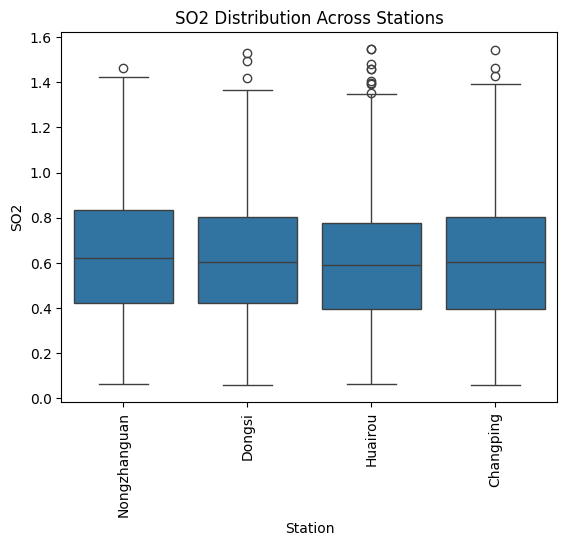

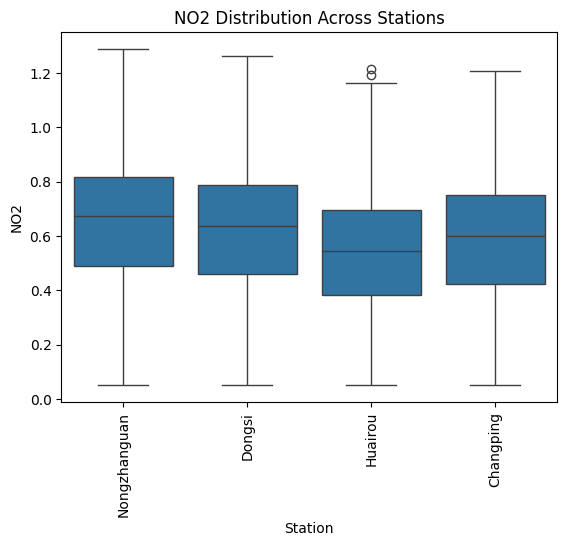

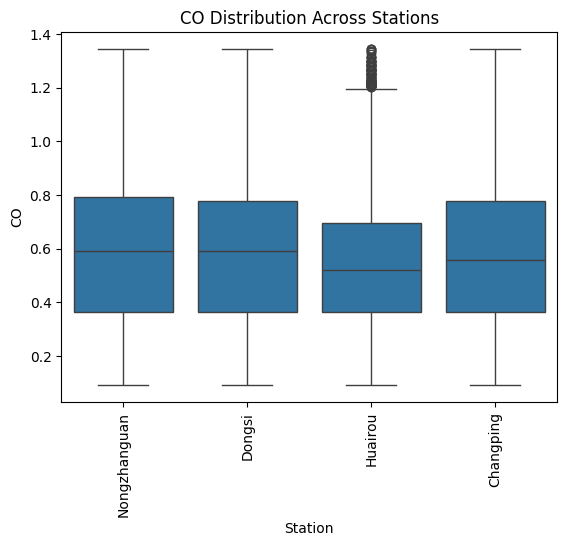

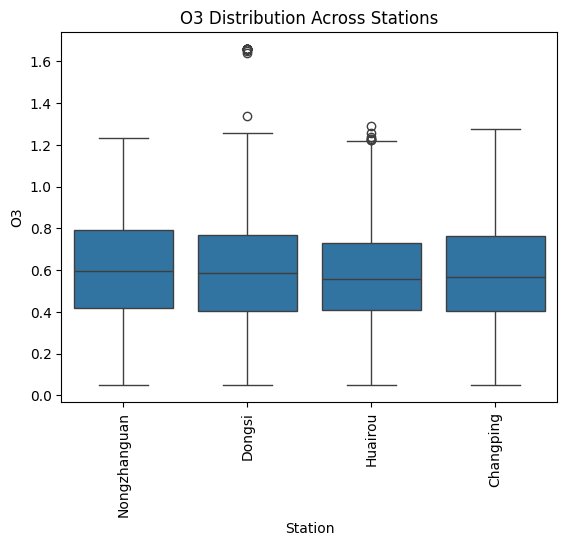

In [32]:
sns.boxplot(x=df['station'], y=df['PM2.5'], data=df)
plt.xticks(rotation=90)
plt.title('PM2.5 Distribution Across Stations')
plt.xlabel('Station')
plt.ylabel('PM2.5')
plt.show()

sns.boxplot(x=df['station'], y=df['PM10'], data=df)
plt.xticks(rotation=90)
plt.title('PM10 Distribution Across Stations')
plt.xlabel('Station')
plt.ylabel('PM10')
plt.show()

sns.boxplot(x=df['station'], y=df['SO2'], data=df)
plt.xticks(rotation=90)
plt.title('SO2 Distribution Across Stations')
plt.xlabel('Station')
plt.ylabel('SO2')
plt.show()

sns.boxplot(x=df['station'], y=df['NO2'], data=df)
plt.xticks(rotation=90)
plt.title('NO2 Distribution Across Stations')
plt.xlabel('Station')
plt.ylabel('NO2')
plt.show()

sns.boxplot(x=df['station'], y=df['CO'], data=df)
plt.xticks(rotation=90)
plt.title('CO Distribution Across Stations')
plt.xlabel('Station')
plt.ylabel('CO')
plt.show()

sns.boxplot(x=df['station'], y=df['O3'], data=df)
plt.xticks(rotation=90)
plt.title('O3 Distribution Across Stations')
plt.xlabel('Station')
plt.ylabel('O3')
plt.show()

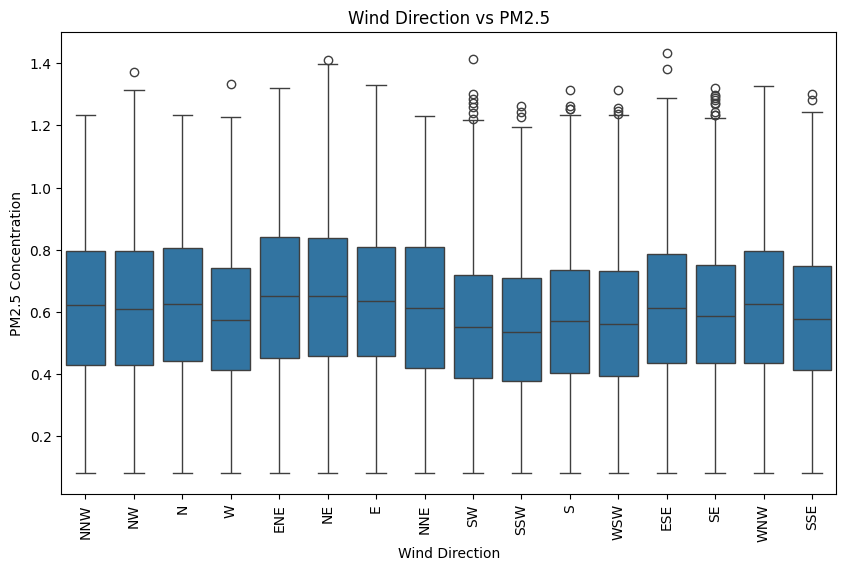

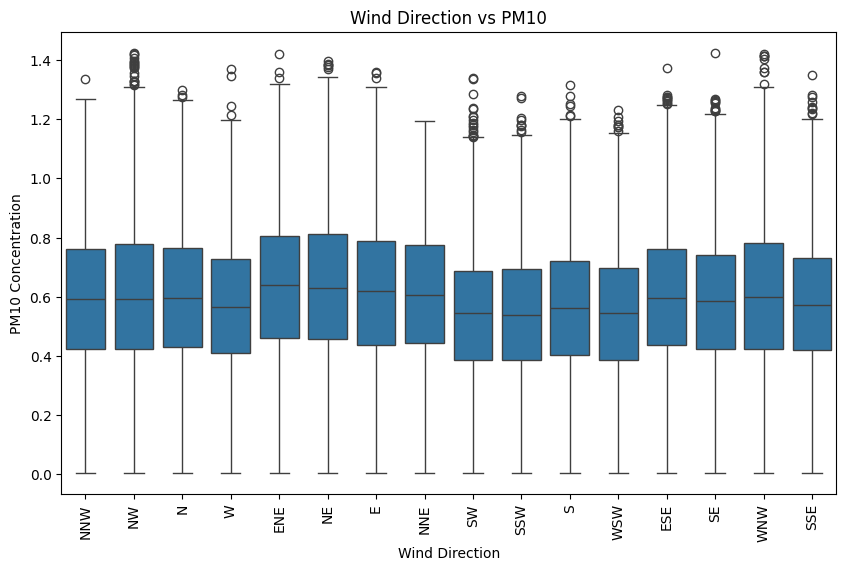

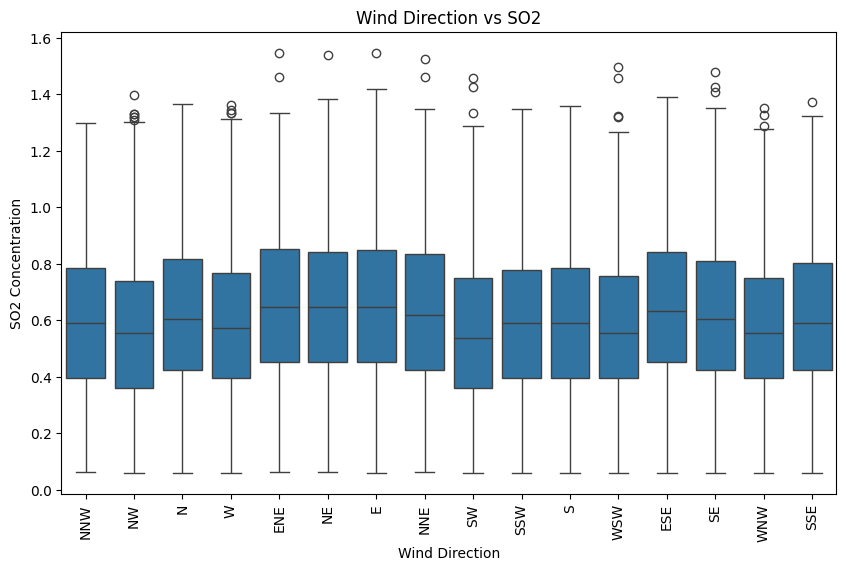

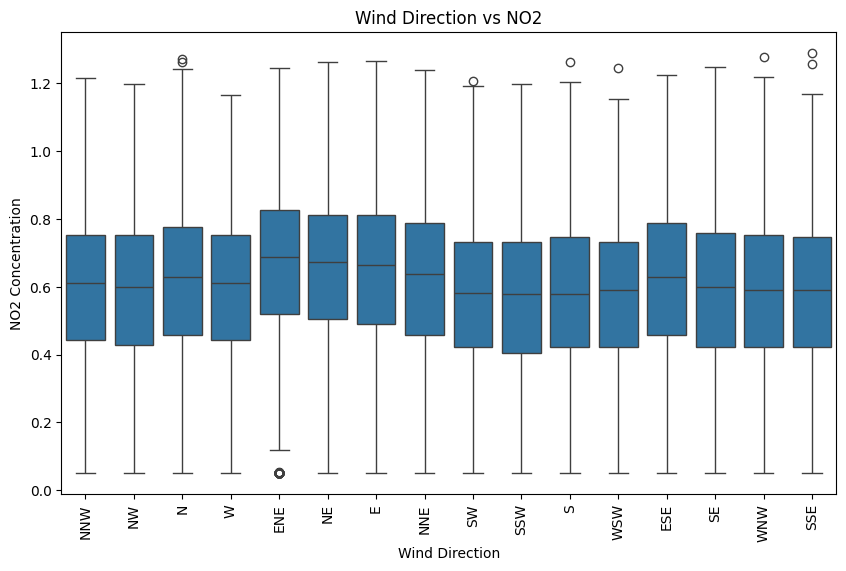

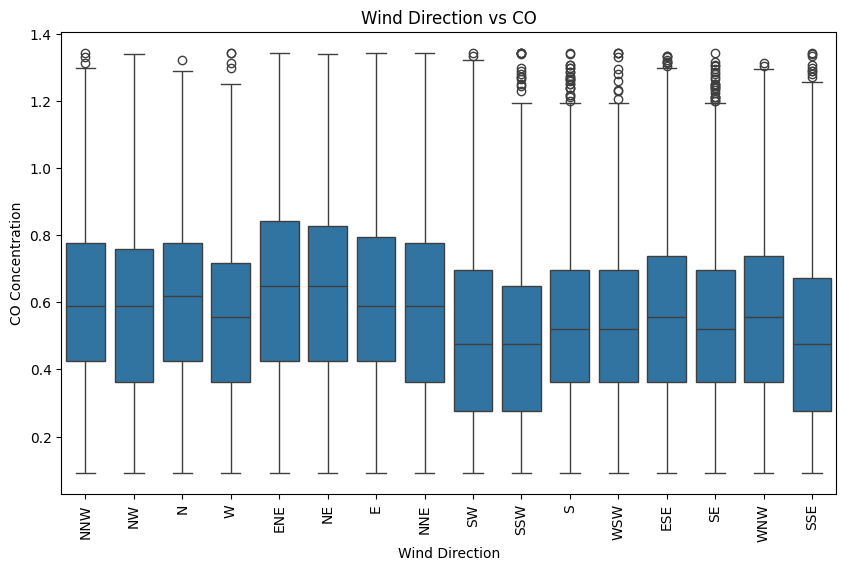

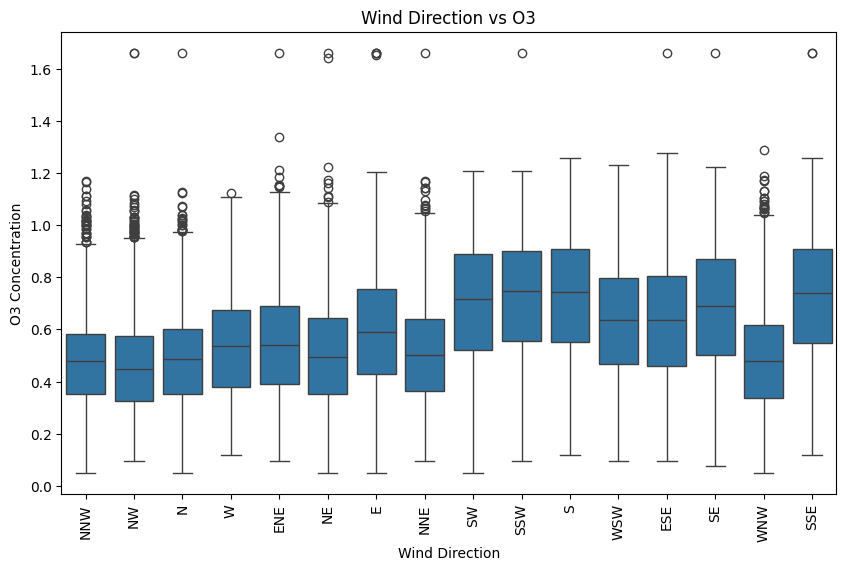

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='wd', y='PM2.5', data=df)
plt.title('Wind Direction vs PM2.5')
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5 Concentration')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='wd', y='PM10', data=df)
plt.title('Wind Direction vs PM10')
plt.xlabel('Wind Direction')
plt.ylabel('PM10 Concentration')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='wd', y='SO2', data=df)
plt.title('Wind Direction vs SO2')
plt.xlabel('Wind Direction')
plt.ylabel('SO2 Concentration')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='wd', y='NO2', data=df)
plt.title('Wind Direction vs NO2')
plt.xlabel('Wind Direction')
plt.ylabel('NO2 Concentration')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='wd', y='CO', data=df)
plt.title('Wind Direction vs CO')
plt.xlabel('Wind Direction')
plt.ylabel('CO Concentration')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='wd', y='O3', data=df)
plt.title('Wind Direction vs O3')
plt.xlabel('Wind Direction')
plt.ylabel('O3 Concentration')
plt.xticks(rotation=90)
plt.show()

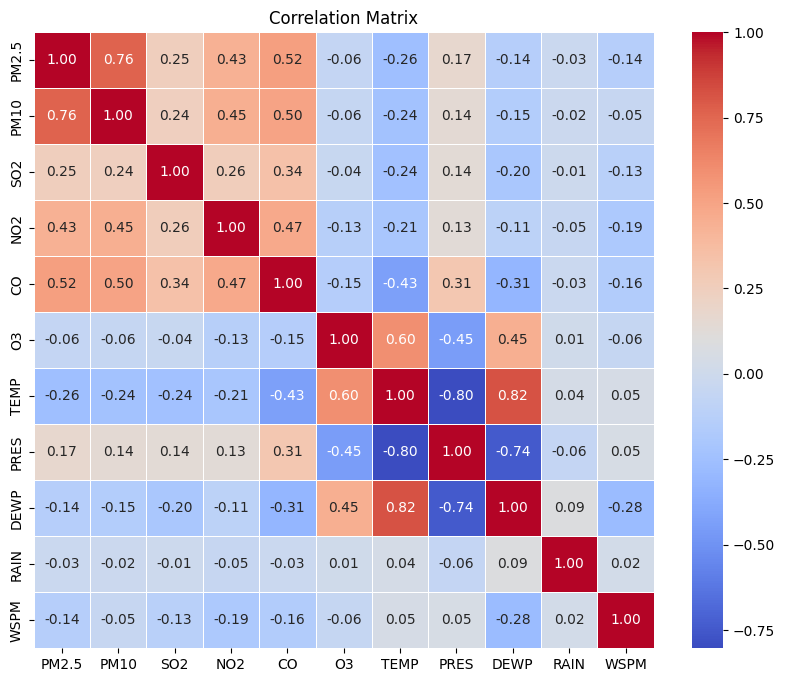

In [34]:
#Multivariate Analysis

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df['Month'] = df['date'].dt.to_period('M')
df_monthly = df.groupby('Month')[['PM2.5', 'PM10', 'NO2', 'CO', 'O3']].mean()

fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Pollutant Levels by Month"]
)

pollutant_columns = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
colors = ['blue', 'red', 'green', 'orange', 'purple']

for pollutant, color in zip(pollutant_columns, colors):
    fig.add_trace(
        go.Scatter(
            x=df_monthly.index.astype(str),
            y=df_monthly[pollutant],
            mode='lines+markers',
            name=pollutant,
            line=dict(color=color)
        )
    )

fig.update_layout(
    title="Month-wise Pollutant Levels",
    xaxis_title="Month",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

fig.show()

### **Task 3: Model Building**

In [36]:
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()
print(correlation_matrix)

          PM2.5      PM10       SO2       NO2        CO        O3
PM2.5  1.000000  0.763893  0.249832  0.434511  0.523131 -0.058541
PM10   0.763893  1.000000  0.243004  0.447485  0.503268 -0.056295
SO2    0.249832  0.243004  1.000000  0.256750  0.342463 -0.039543
NO2    0.434511  0.447485  0.256750  1.000000  0.473212 -0.127555
CO     0.523131  0.503268  0.342463  0.473212  1.000000 -0.147695
O3    -0.058541 -0.056295 -0.039543 -0.127555 -0.147695  1.000000


In [20]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df[['PM10', 'SO2', 'NO2', 'CO', 'O3']]
y = df['PM2.5']

X = X.fillna(X.median())
y = y.fillna(y.median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_dist = {
    'n_estimators': [100],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'max_features': ['sqrt']
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, verbose=2)

random_search.fit(X_train_scaled, y_train)

best_rf_model = random_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Mean Squared Error: 81.09931300102778
R-squared: 0.9870509412430241
Root Mean Squared Error: 9.00551569878304


In [21]:
print(df['PM2.5'].describe())

count    1.097208e+06
mean     7.795936e+01
std      7.980779e+01
min      2.000000e+00
25%      1.900000e+01
50%      5.300000e+01
75%      1.080000e+02
max      8.820000e+02
Name: PM2.5, dtype: float64


  Feature  Importance
0    PM10    0.536910
3      CO    0.268434
2     NO2    0.109870
1     SO2    0.056277
4      O3    0.028509


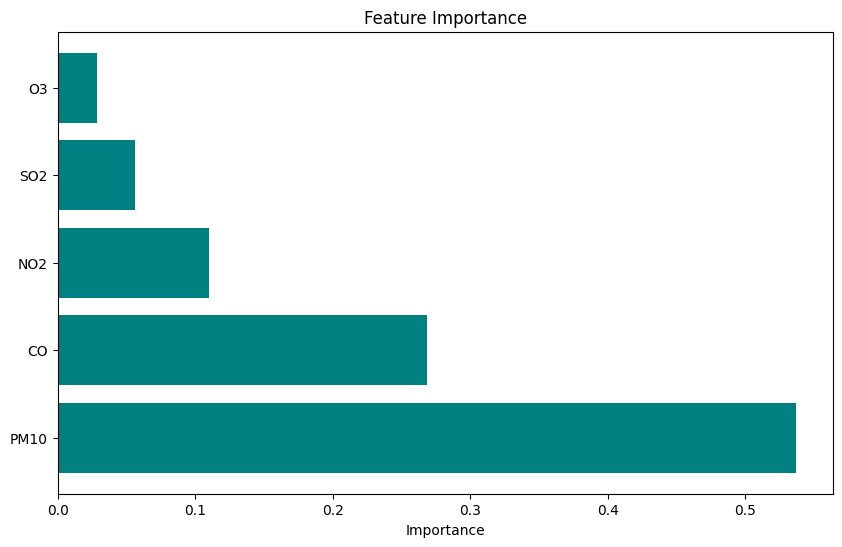

In [22]:
importances = best_rf_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

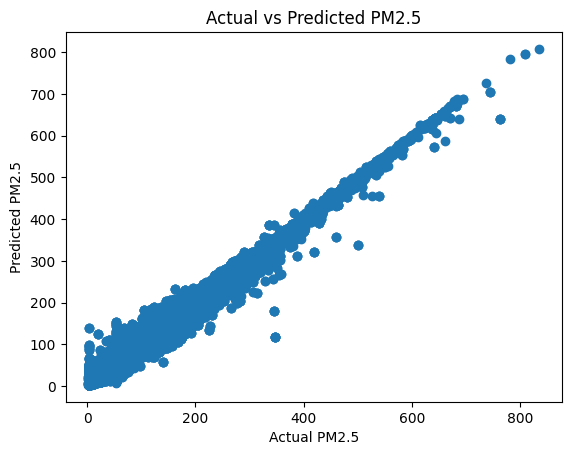

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.show()

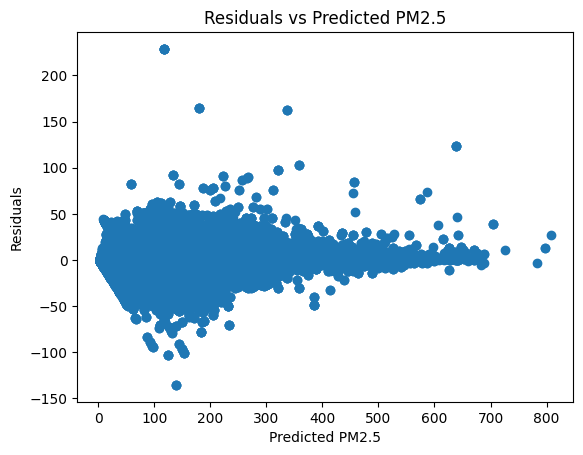

In [24]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted PM2.5')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted PM2.5')
plt.show()